# Keras Regression Code Along Project

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#### The problem
* Develop a neural network model to predict the house price based on the above features.

In [1]:
#
# Your code to import libraries, numpy, pandas, matplotlib,  seaborn
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Your code to read the data from the file provided.
df=pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

Perform some data analysis using the libraries above.
Visualise the features to understand the problem and use the appropriate features for the model.

In [3]:
# Your code to check if any null value is present in the dataset. Hint - use isnull() in pandas
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# Your code to describe the dataset to get imortant properties of it.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# Let's see how price columns look like i.e. how prices are distributed.

C:\Users\mandh\AppData\Local\Temp\ipykernel_27200\4209215003.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

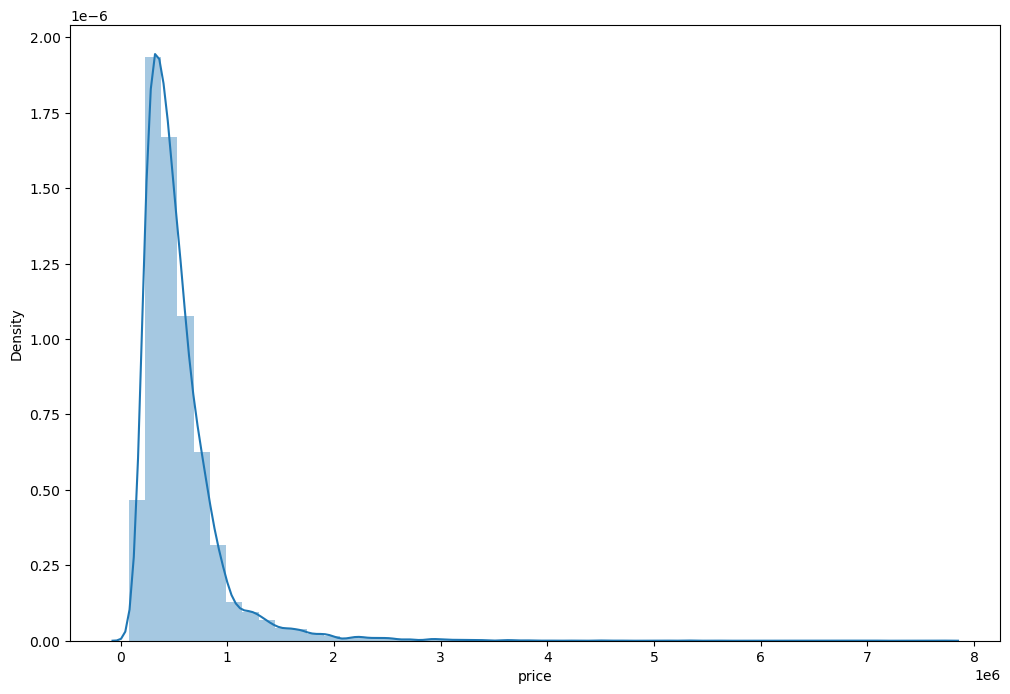

In [5]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

#### Let's look at the columns - number of bedroom in more detail
#### Write code to plot the numbers of bedrooms and the number of times they appear in the data.  
####The x-axis contains the number of bedrroms and the y axis will portray the number of times the particular bedroom appears in the column.

#### Hint - use sns.countplot.  

In [6]:
sns.countplot?

<Axes: xlabel='bedrooms', ylabel='count'>

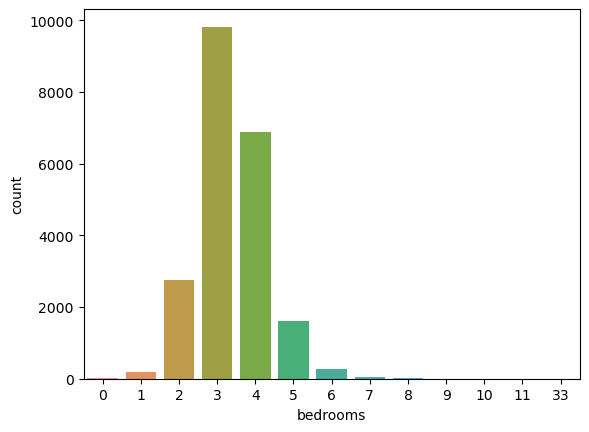

In [7]:
# Your code to plot number of bedrooms and their counts
sns.countplot(x='bedrooms',data=df)

# Plot a scatter plot between the price and sqft_living column.

<Axes: xlabel='bedrooms', ylabel='sqft_living'>

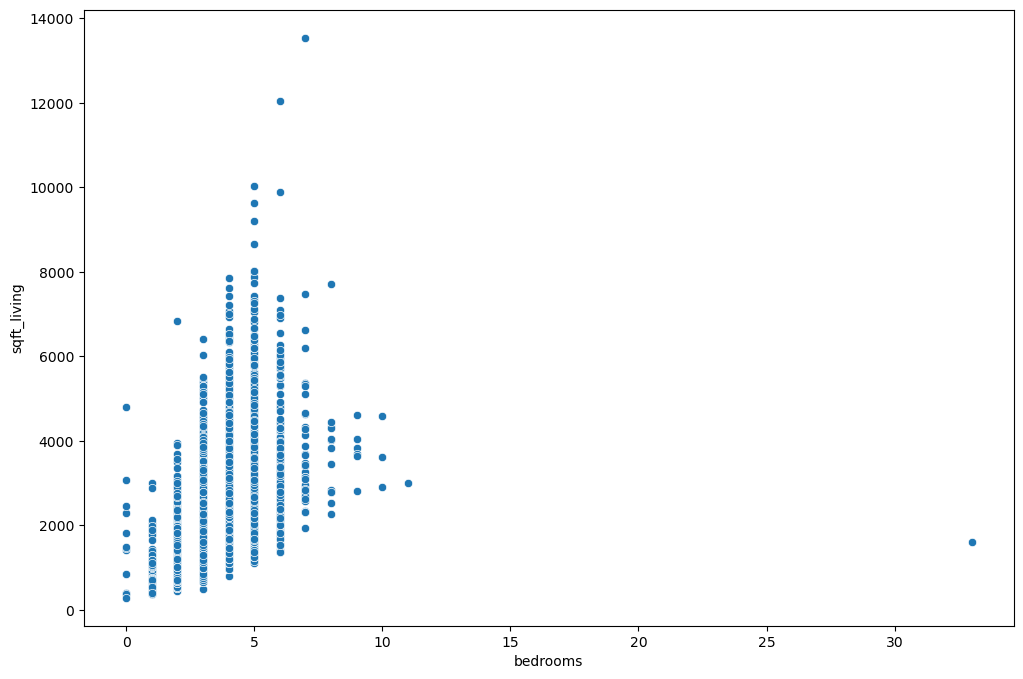

In [9]:
# You code to visualize an scatter plot.
plt.figure(figsize=(12,8))
sns.scatterplot(x="bedrooms", y='sqft_living',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

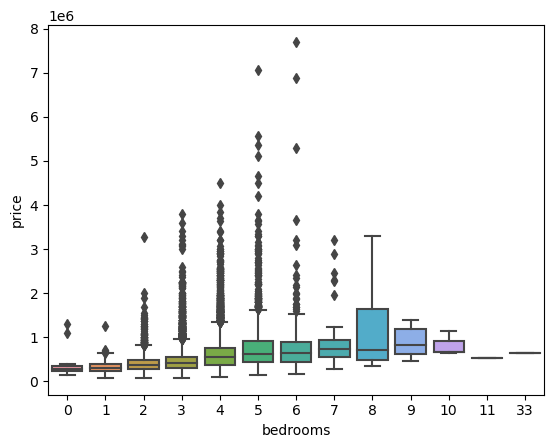

In [10]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

Visulaize an scatter plot between price and longitude (long) and latidtude (lat)  columns.



<Axes: xlabel='price', ylabel='long'>

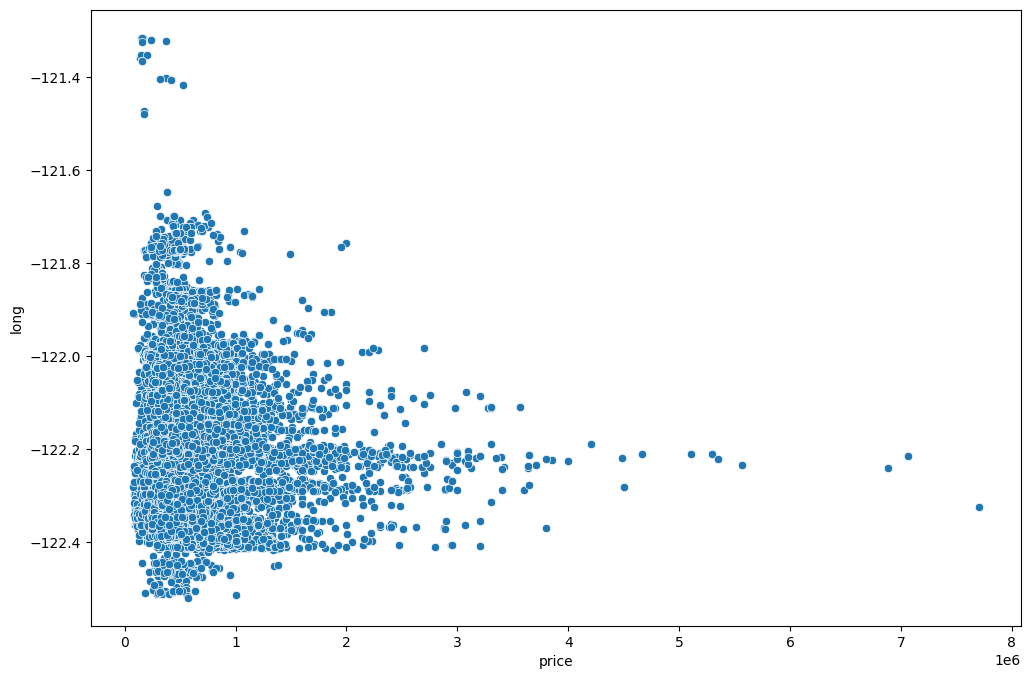

In [11]:
# Your code to visualize an scatter plot between price and longitude (long) column.
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long',data=df)

<Axes: xlabel='price', ylabel='lat'>

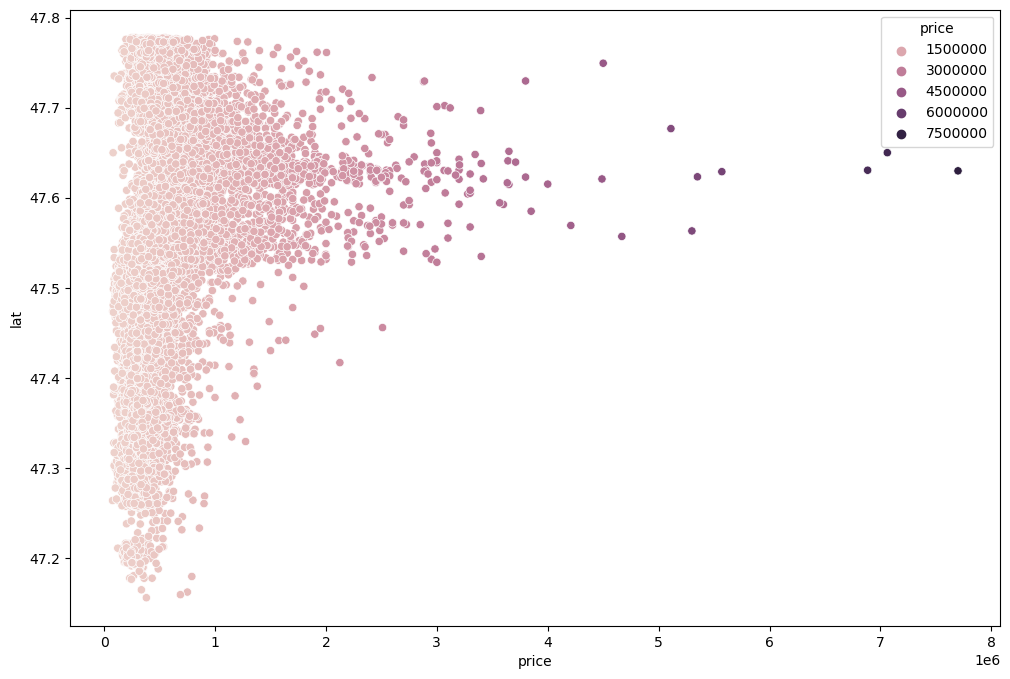

In [12]:
# Your code to visualize an scatter plot between price and latitude(lat) column.
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data= df, hue='price')

<Axes: xlabel='long', ylabel='lat'>

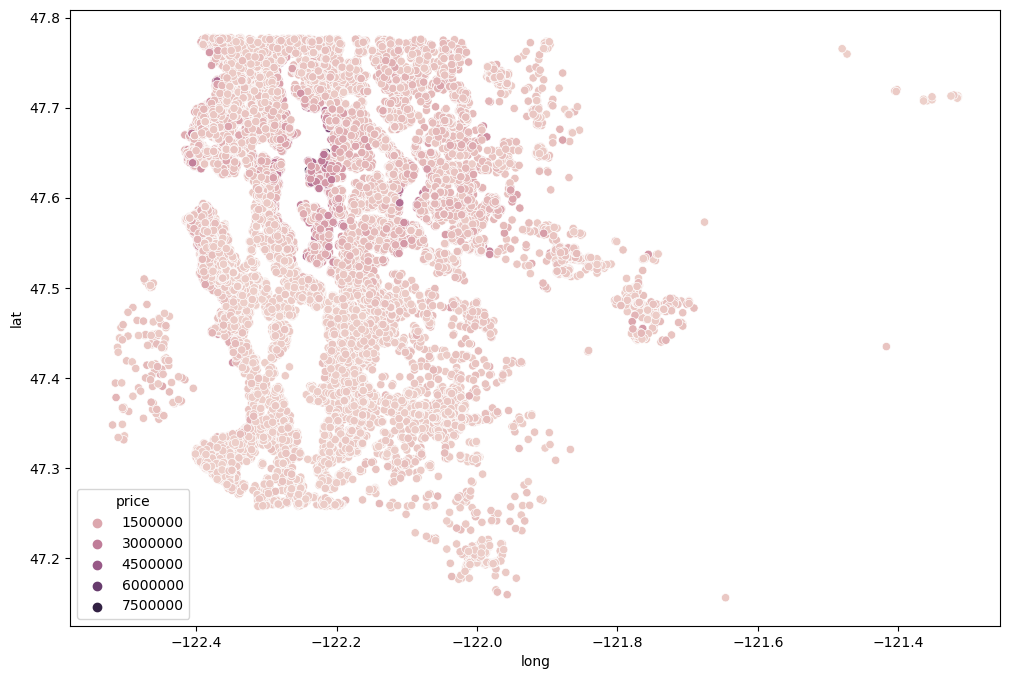

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

# Sort the values in the dataframe according to price and print first few rows.

In [14]:
# Your code to sort data frame according to the price (ascending order) and see first few rows. 
# Hint - Use df.sort_values and combine it with head()
df.sort_values(by=['price']).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
2141,1623049041,20140508T000000,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
18468,7999600180,20140529T000000,83000.0,2,1.00,900,8580,1.0,0,0,...,5,900,0,1918,0,98168,47.4727,-122.270,2060,6533
3767,1523049188,20150430T000000,84000.0,2,1.00,700,20130,1.0,0,0,...,6,700,0,1949,0,98168,47.4752,-122.271,1490,18630
16714,1322049150,20150305T000000,85000.0,2,1.00,910,9753,1.0,0,0,...,5,910,0,1947,0,98032,47.3897,-122.236,1160,7405
10253,2422049104,20140915T000000,85000.0,2,1.00,830,9000,1.0,0,0,...,6,830,0,1939,0,98032,47.3813,-122.243,1160,7680


In [15]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


#### The following code visualizes the price intensity with the latitude and longitude for 1% and 99% of the data separately.

#### You need to add comment on each line of the code.

In [16]:
len(df)*(0.01)

216.13

In [17]:
df.iloc[216:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
216,46100204,20150221T000000,1505000.0,5,3.00,3300,33474,1.0,0,3,...,9,1870,1430,1957,1991,98040,47.5673,-122.210,3836,20953
217,1909600046,20140703T000000,445838.0,3,2.50,2250,5692,2.0,0,0,...,8,2250,0,2000,0,98146,47.5133,-122.379,1320,5390
218,1250202145,20140828T000000,1072000.0,2,2.25,3900,14864,1.0,0,3,...,8,1950,1950,1947,0,98144,47.5884,-122.291,2580,5184
219,7611200125,20141023T000000,467000.0,2,1.50,1320,10800,1.0,0,0,...,8,1320,0,1947,0,98177,47.7145,-122.367,2120,12040
220,5611500140,20140822T000000,686000.0,4,2.50,2760,6440,2.0,0,0,...,10,2760,0,1999,0,98075,47.5836,-122.026,3070,8127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [18]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]
non_top_1_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3281,8964800025,20150226T000000,1965000.0,5,3.75,3940,13738,1.5,0,3,...,9,3940,0,1951,0,98004,47.6203,-122.212,2370,13320
12577,2806300065,20150422T000000,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
12283,1923000260,20141015T000000,1959000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
1152,4055701200,20150421T000000,1955000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
9175,3124059023,20150213T000000,1955000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387


<Axes: xlabel='long', ylabel='lat'>

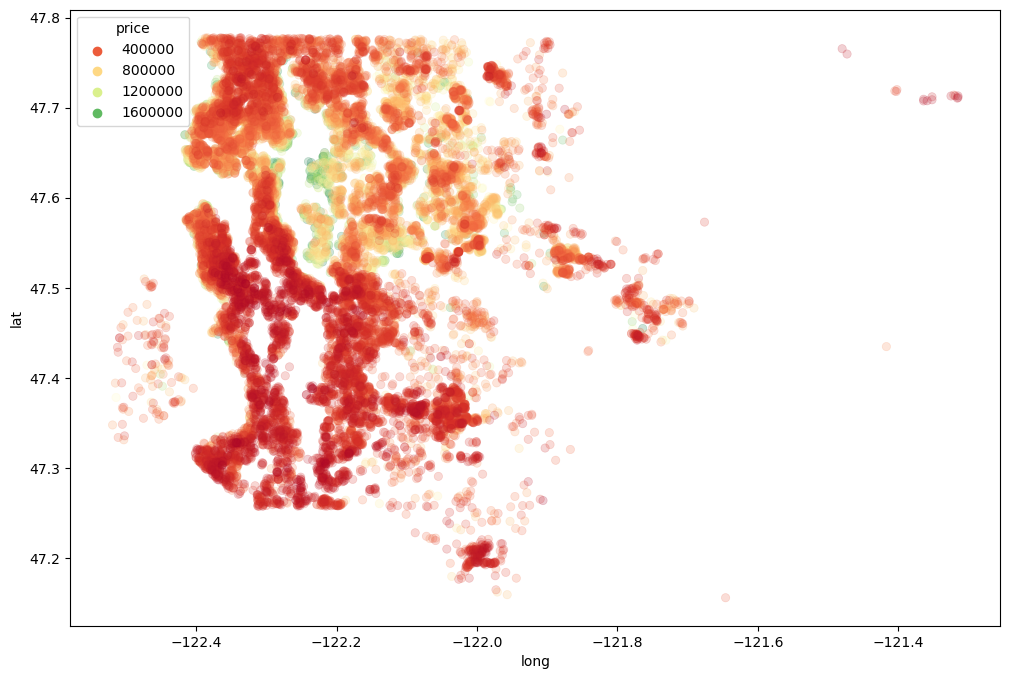

In [19]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='long',y='lat', 
                data=non_top_1_perc,hue='price', 
                palette='RdYlGn',edgecolor=None,alpha=0.2)

### Other Features
# Let's have a box plot between waterfront and price.

# Explain what box plot is doing?

<Axes: xlabel='waterfront', ylabel='price'>

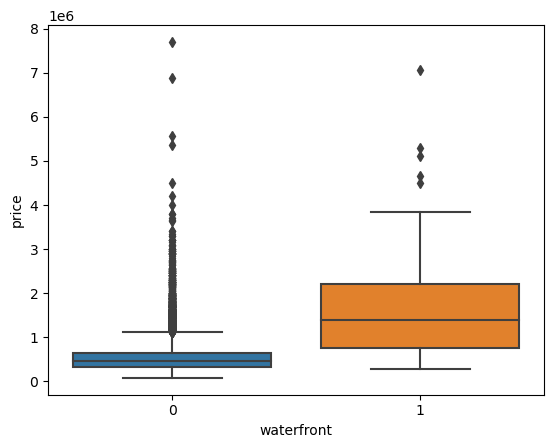

In [20]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [21]:
# Your code to print first few rows of the data.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
# Your code to print info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Following code is dropping the column ID.

Question - why are dropping this column?

In [23]:
df = df.drop('id',axis=1) 

In [24]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

Transform the features into useful formats to apply appropriate Deep NN technique!

In [25]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
#df['year'] = df['date'].apply(lambda date:date.year)

# Your code to check what above code is doing.


In [26]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

<Axes: xlabel='year', ylabel='price'>

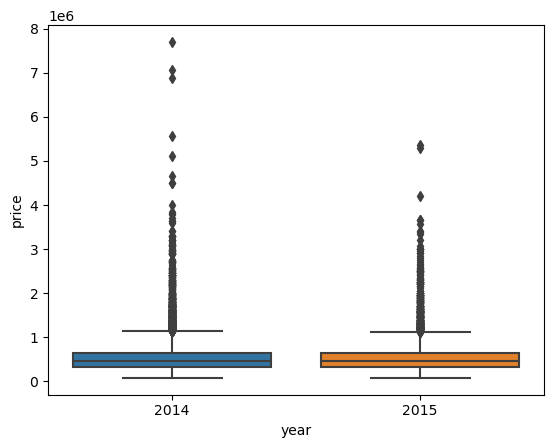

In [28]:
sns.boxplot(x='year',y='price',data=df)

<Axes: xlabel='month', ylabel='price'>

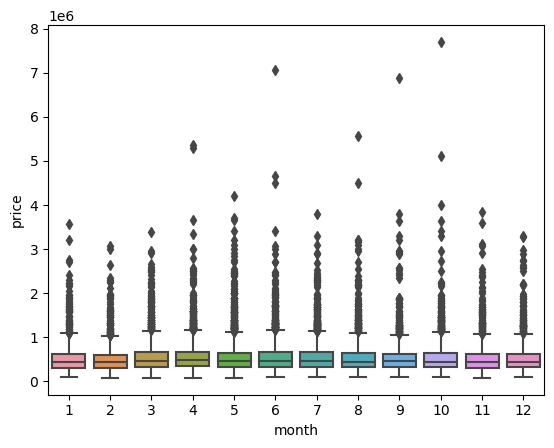

In [29]:
sns.boxplot(x='month',y='price',data=df)

<Axes: xlabel='month'>

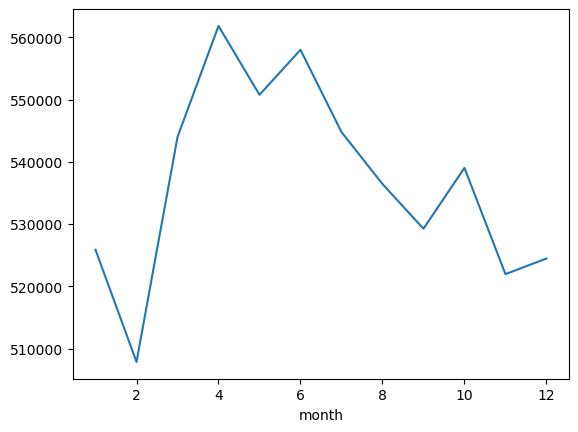

In [30]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

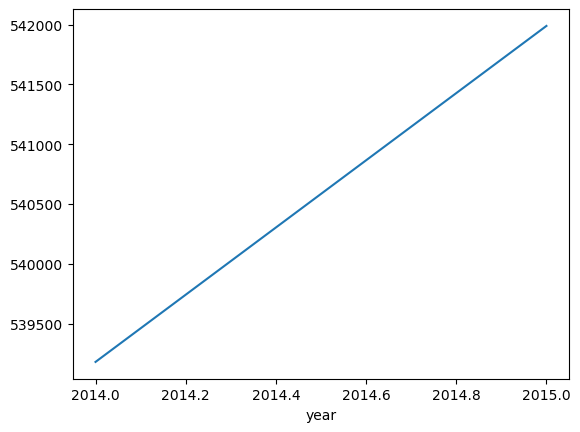

In [31]:
df.groupby('year').mean()['price'].plot()

In [32]:
# we do not need the 'date' column anymore

df = df.drop('date',axis=1)

In [33]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [34]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [35]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [37]:
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [38]:
df['sqft_basement'].value_counts()

sqft_basement
0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

Should we remove zipcode?  If so, remove it.

In [46]:
# Your code to remove zip code - Hint - Use df.drop
# Your code to remove 'date' column.



In [48]:
# could make sense due to scaling, higher should correlate to more value


## Scaling and Train Test Split

Scikit-Learn is used to split out the train-test library.

First separate input and output. Input will be stored in the variable X and output in variable y.

In [39]:
# Your code to store all columns except price column in variable X. Hint - Use pd.drop()
# Your code to store output (price column) in variable y
x=df.drop('price',axis=1)
y=df['price']

In [40]:
from sklearn.model_selection import train_test_split


In [41]:
# Your code to separate X and y into X_train, X_test, y_train, y_test i.e. getting training and testing set for the model.

# You can choose your unique test data size as a percentage of the original dataset. 
# It is better to consider the range from 15 to 35% 
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15129, 20) (6484, 20) (15129,) (6484,)


### Scaling

Features are scaled to be in a proper range to be useful for modeling.
Scaling converts all values between 0-1.

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data, such as the mean and variance of the features of the training set. These learned and fixed parameters are then used to scale our test data with the transform() function.

In [44]:
# Your code to print shapes of X_train, X_test, y_train, y_test and see if shapes are okay.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15129, 20) (6484, 20) (15129,) (6484,)


## Creating a Model

Build a Deep NN model with appropriate layers using Keras.  

In [45]:
#
# Import Libraries for Neural Network model development.
#

import tensorflow as tf
from tensorflow import keras



Develop your own Neural Network model with suitable number of input, output, and any number of hidden layers. Since we are predicting a value, the number of neurons in outpit layer should be one.

In [46]:
#
# Your code to build MLP neural network model.
#
model = keras.Sequential([
    keras.layers.Dense(543, activation='sigmoid', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(130, activation='softmax'),
    keras.layers.Dense(55, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])



In [47]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 543)               11403     
                                                                 
 dense_1 (Dense)             (None, 130)               70720     
                                                                 
 dense_2 (Dense)             (None, 55)                7205      
                                                                 
 dense_3 (Dense)             (None, 32)                1792      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 91153 (356.07 KB)
Trainable params: 91153 (356.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [49]:
model = Sequential()

model.add(Dense(19,activation='sigmoid'))
model.add(Dense(19,activation='softmax'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='sigmoid'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

Write the code to train the neural network model. Use the following of your choice:



1.   Optimization method
2.   Batch size
3.   Number of epochs.

Test for various optimizers and check which one performs better in terms of loss function = 'mse'.

Use following APIs
* https://keras.io/api/optimizers/
* https://keras.io/api/losses/regression_losses/
* https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
* https://keras.io/api/models/model_training_apis/



In [50]:
# ! add your chosen optimiser !

model.compile(optimizer='adam', loss='mse')

In [51]:
#
# Your code to train the model.
#
history = model.fit(X_train, y_train, batch_size=128, epochs=20, 
                    #validation_split=0.2, 
                    verbose=1)

Epoch 1/20

119/119 [==============================] - 2s 2ms/step - loss: 423638564864.0000
Epoch 2/20
119/119 [==============================] - 0s 2ms/step - loss: 423635779584.0000
Epoch 3/20
119/119 [==============================] - 0s 2ms/step - loss: 423633420288.0000
Epoch 4/20
119/119 [==============================] - 0s 2ms/step - loss: 423631683584.0000
Epoch 5/20
119/119 [==============================] - 0s 2ms/step - loss: 423630045184.0000
Epoch 6/20
119/119 [==============================] - 0s 2ms/step - loss: 423628505088.0000
Epoch 7/20
119/119 [==============================] - 0s 2ms/step - loss: 423627128832.0000
Epoch 8/20
119/119 [==============================] - 0s 2ms/step - loss: 423625719808.0000
Epoch 9/20
119/119 [==============================] - 0s 2ms/step - loss: 423624441856.0000
Epoch 10/20
119/119 [==============================] - 0s 2ms/step - loss: 423623131136.0000
Epoch 11/20
119/119 [==============================] - 0s 2ms/step - loss: 423

# Following code gets the history of losses at every epoch.

<Axes: >

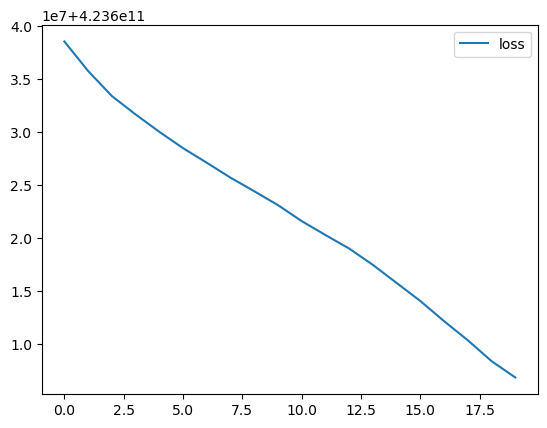

In [52]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Scikit-Learn has metrics to evaluate the performance.

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

#### Next, we will test the performance of our model by predicting on test dataset X_test.

In [54]:
# Your code to print X_test and see how test data looks like.
print(X_test)

[[0.18181818 0.125      0.05735849 ... 0.010289   0.         1.        ]
 [0.36363636 0.28125    0.13207547 ... 0.00909894 0.27272727 1.        ]
 [0.36363636 0.3125     0.16679245 ... 0.00418246 0.09090909 1.        ]
 ...
 [0.27272727 0.25       0.17584906 ... 0.00821673 0.90909091 0.        ]
 [0.18181818 0.125      0.04603774 ... 0.0044122  0.27272727 1.        ]
 [0.36363636 0.4375     0.24226415 ... 0.01018447 0.72727273 0.        ]]


# Following you will predict the output based on the input data X_test.

Lonk to API - https://keras.io/api/models/model_training_apis/#predict-method

In [55]:
# Your code to make a predictions using (model.predict (<input_data>) method ). 
# Store the predictions in the variable predictions

predictions = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


## Following code will test the error in the predicted values. 
## Error is the difference between the predictions you made and real values (y_test)

In [56]:
print (mean_absolute_error(y_test, predictions ))
print(np.sqrt(mean_squared_error(y_test,predictions))) # There is an error in this line. Fix the error.
print (explained_variance_score(y_test,predictions))

541087.3311587638
658065.6515737446
1.758460044243293e-11


The following code plots the predicted values in a scatter plot. We have also plotted the perfect predictions.

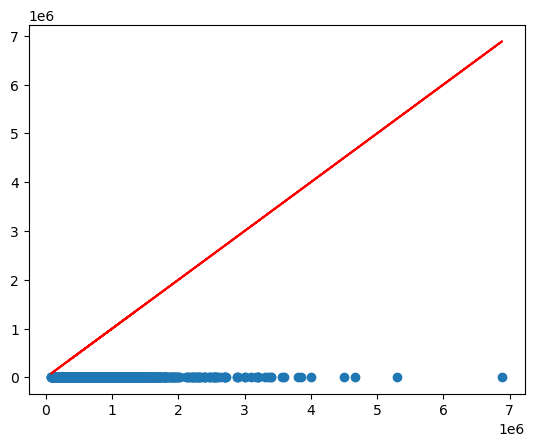

In [57]:
# Our predictions
plt.scatter(y_test, predictions)

# Perfect predictions
plt.plot(y_test, y_test, 'r')

In the following code, we have plotted the error i.e. the difference between the actual and predicted values.

C:\Users\mandh\AppData\Local\Temp\ipykernel_27200\822056149.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: ylabel='Density'>

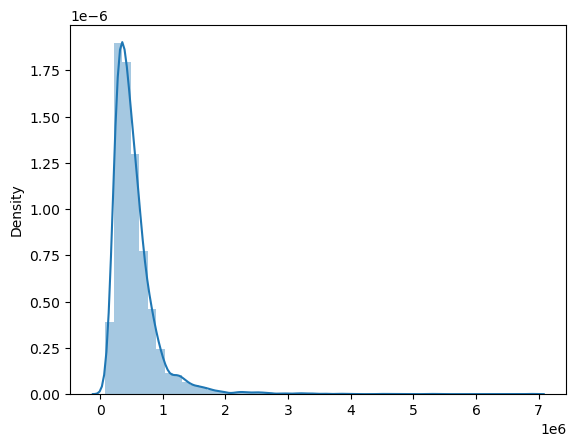

In [58]:
errors = y_test.values.reshape(6484, 1) - predictions
sns.distplot(errors)


### Following code makes prediction on a brand new house. Comment each line of the code.

Try predicting price for a new home.

In [59]:
single_house = df.drop('price',axis=1).iloc[0]

In [60]:
single_house 

bedrooms             3.0000
bathrooms            1.0000
sqft_living       1180.0000
sqft_lot          5650.0000
floors               1.0000
waterfront           0.0000
view                 0.0000
condition            3.0000
grade                7.0000
sqft_above        1180.0000
sqft_basement        0.0000
yr_built          1955.0000
yr_renovated         0.0000
zipcode          98178.0000
lat                 47.5112
long              -122.2570
sqft_living15     1340.0000
sqft_lot15        5650.0000
month               10.0000
year              2014.0000
Name: 0, dtype: float64

In [61]:
single_house.size

20

In [62]:
single_house = scaler.transform(single_house.values.reshape(-1, 20))

C:\Users\mandh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [63]:
model.predict(single_house)

1/1 [==============================] - 0s 21ms/step


array([[29.650948]], dtype=float32)

In [64]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
zipcode           98178.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

In [65]:
# The prediction result:

err = int(model.predict(single_house)) - df['price'].iloc[0]

print( 'absolute prediction error = ', err, ' $')
print( 'relative prediction error = ', err / df['price'].iloc[0] *100 , ' %')

1/1 [==============================] - 0s 24ms/step
absolute prediction error =  -221871.0  $
relative prediction error =  -99.98693105002253  %


# Lab Logbook requirement:

# Please record the plot of the  model's  loss after every epoch and a summary in lab logbook. You can obtain the model summary using the model.summary() method. The API for obtaining the model summary is defined in the following link:


# https://keras.io/api/models/model/#summary-method


# Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.







## Try different optimisations like changing model architecture, activation functions, training parameters.